In [93]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import tensorflow as tf

#### SVM

In [9]:
# df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')

# # Convert datetime to Unix timestamps (float)
# df['Time'] = df['Time'].astype(int) / 10**9  # Convert nanoseconds to seconds

df = pd.read_csv('../Data/Merged_Kp.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')
df['Time'] = df['Time'].astype('int64') / 10**9  # Convert nanoseconds to seconds
df

,Time,Bx,By,Bz,a,b,c,d,e,f,...,ap,aq,ar,as,at,au,av,aw,ax,Kp
0,1.672531e+09,-2.70274,4.51236,-1.45806,43.044500,0.231726,0.231726,0.818269,22.607500,0.231726,...,322.576,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.333
1,1.672542e+09,-3.50988,3.28923,0.955087,13.476300,0.231726,0.231726,1.191370,3.023420,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3.000
2,1.672553e+09,-4.19601,1.13274,-2.28889,1.704520,0.231726,0.231726,0.678223,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.000
3,1.672564e+09,-3.82492,2.54654,-1.1996,15.709700,0.231726,0.231726,0.585838,1.713000,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.667
4,1.672574e+09,-4.00157,1.30163,2.07415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,1.683018e+09,4.44582,0.0744136,-1.34245,1.404280,0.231726,0.761706,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.667
972,1.683029e+09,4.05329,-0.60975,2.69305,1.196930,0.231726,0.429790,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000
973,1.683040e+09,3.60467,2.52151,1.76777,1.237600,0.231726,0.369987,0.231726,0.231726,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000
974,1.683050e+09,4.78423,0.161718,-1.60693,0.231726,0.231726,0.582688,5.535300,8.985620,0.231726,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.667


In [19]:
x = df.drop(['Kp'], axis=1)
y = df['Kp']

In [20]:
# Drop all rows containing '#NAME?'
threshold = df.shape[1] / 2
df = df[(df == 0).sum(axis=1) <= threshold]
df.reset_index(drop=True, inplace=True)

In [28]:
x = df.iloc[:, 1:-1]
y = df.iloc[:, -1].values.reshape(-1, 1)

x.shape, y.shape

((893, 53), (893, 1))

In [29]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [31]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

regressor2 = SVR(kernel='linear')
regressor2.fit(x_train, y_train)

regressor3 = SVR(kernel='poly')
regressor3.fit(x_train, y_train)

regressor4 = SVR(kernel='sigmoid')
regressor4.fit(x_train, y_train)

c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

SVR(kernel='sigmoid')

In [33]:
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.76
Root Mean Squared Error (RMSE): 0.87
R-squared (R2) Score: 0.30


In [34]:
y_pred = regressor2.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.65
Mean Squared Error (MSE): 0.86
Root Mean Squared Error (RMSE): 0.93
R-squared (R2) Score: 0.20


In [35]:
y_pred = regressor3.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.05
Root Mean Squared Error (RMSE): 1.02
R-squared (R2) Score: 0.03


In [36]:
y_pred = regressor3.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.05
Root Mean Squared Error (RMSE): 1.02
R-squared (R2) Score: 0.03


#### LSTM

In [174]:
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False

df = pd.read_csv('../Data/Merged_Kp.csv', index_col='Time')
# df1['Time'] = pd.to_datetime(df1['Time'], format='%d-%m-%Y %H:%M')

In [175]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,...,ap,aq,ar,as,at,au,av,aw,ax,Kp
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,...,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.0,976.0,976.000000
mean,5.417732,0.374665,9.382320,6.243786,13.708767,7.396531,16.383965,18.932904,81.027095,55.552081,...,3.196412,2.244659,0.793239,0.854912,0.511765,0.403636,0.305260,0.0,0.0,2.162215
std,16.271821,4.011151,19.250585,12.145691,16.301473,12.637308,23.474725,38.835742,77.232795,101.426012,...,30.890661,27.131489,17.828122,18.933641,15.988061,12.610000,9.536635,0.0,0.0,1.337777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.451097,0.231726,0.231726,0.231726,0.358607,0.231726,0.231726,0.231726,34.719750,0.935871,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.498265,0.231726,2.300685,0.826721,9.795995,0.309557,5.874765,3.606680,72.258100,31.635950,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000
75%,5.087228,0.231726,15.096300,9.274207,23.754200,13.300325,28.731350,26.789100,107.371000,59.297175,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000
max,353.611000,125.235000,312.665000,214.058000,221.506000,112.366000,331.323000,615.550000,823.726000,1649.650000,...,395.163000,452.895000,460.641000,449.811000,499.483000,393.949000,297.934000,0.0,0.0,8.333000


In [142]:
df.query("Kp > 5.0")

,Bx,By,Bz,a,b,c,d,e,f,g,...,ap,aq,ar,as,at,au,av,aw,ax,Kp
Time,,,,,,,,,,,,,,,,,,,,,
15-02-2023 06:00,0.548709,-1.49109,-11.0531,0.975233,0.231726,9.259770,5.234900,31.668000,13.086200,28.913800,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,5.333
26-02-2023 21:00,5.42505,-12.2013,-2.70466,192.741000,0.231726,0.231726,92.384000,171.106000,0.231726,0.231726,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,5.667
27-02-2023 03:00,0.112552,-2.71718,9.96907,38.528000,0.231726,3.103360,0.830051,30.365100,5.021590,3.582630,...,349.408,452.895,460.641,384.583,0.0,0.0,0.0,0,0,6.000
27-02-2023 06:00,7.43248,-6.21213,-11.7049,81.978700,0.231726,0.231726,55.399600,62.295000,0.231726,0.231726,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.667
27-02-2023 09:00,9.8303,-5.2623,-7.05611,123.487000,0.231726,0.231726,65.454800,98.841300,0.231726,0.231726,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.667
27-02-2023 12:00,6.99228,3.6216,-7.39211,11.919400,0.231726,0.660086,0.231726,15.814900,7.311820,8.097160,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.333
27-02-2023 15:00,-6.48457,2.20196,-9.15128,1.289740,0.231726,0.231726,0.231726,2.177270,0.323087,1.313930,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.667
27-02-2023 18:00,-2.68723,-6.56205,-2.13704,1.565200,0.231726,0.231726,0.231726,1.719180,0.231726,0.244990,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.333
27-02-2023 21:00,7.03876,-0.157385,-4.33954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0,0,6.000


In [177]:
# Drop all rows containing '#NAME?'
threshold = df.shape[1] / 2
df = df[(df == 0).sum(axis=1) <= threshold]
df.reset_index(drop=True, inplace=True)

In [178]:
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df.iloc[:, :])
df1

array([[0.44202255, 0.69894696, 0.40895579, ..., 0.        , 0.        ,
        0.2799712 ],
       [0.41228706, 0.67517863, 0.45907557, ..., 0.        , 0.        ,
        0.3600144 ],
       [0.38700965, 0.6332729 , 0.3916999 , ..., 0.        , 0.        ,
        0.2400096 ],
       ...,
       [0.67439103, 0.66026001, 0.47595456, ..., 0.        , 0.        ,
        0.1200048 ],
       [0.71784667, 0.61440363, 0.40586384, ..., 0.        , 0.        ,
        0.200048  ],
       [0.68594754, 0.66267856, 0.40051571, ..., 0.        , 0.        ,
        0.0800432 ]])

In [187]:
features = df1
target = df1[:, -1]

In [188]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.44202255, 0.69894696, 0.40895579, 0.12115248, 0.        ,
          0.        , 0.00274308, 0.10112235, 0.        , 0.        ,
          0.00544071, 0.20082892, 0.        , 0.069104  , 0.1455291 ,
          0.18696808, 0.10090019, 0.1804631 , 0.1397051 , 0.25938483,
          0.15109638, 0.11955319, 0.22782478, 0.16729086, 0.22617883,
          0.23976581, 0.3270244 , 0.36694528, 0.31013412, 0.52757154,
          0.41505781, 0.60182546, 0.5454073 , 0.63571371, 0.50249802,
          0.45521823, 0.3340829 , 0.54376704, 0.520862  , 0.4736512 ,
          0.42344221, 0.54824006, 0.76047126, 0.88728739, 0.81631124,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.2799712 ],
         [0.41228706, 0.67517863, 0.45907557, 0.03747977, 0.        ,
          0.        , 0.00448796, 0.01261644, 0.        , 0.        ,
          0.00418379, 0.13789486, 0.        , 0.11351616, 0.13491958,
          0.17359701, 0.1441388

In [210]:
# x_temp, x_test, y_temp, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=False)
# x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1, random_state=42, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, shuffle=False)

In [211]:
x_train.shape, x_test.shape

((625, 54), (268, 54))

In [212]:
win_length = 8 # 2 days worth of data, 8 points per day for 2 days
batch_size = 8 # 32 sequences per batch
num_features = 53 # 53 features
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [213]:
train_generator[0], test_generator[0]

((array([[[0.44202255, 0.69894696, 0.40895579, ..., 0.        ,
           0.        , 0.2799712 ],
          [0.41228706, 0.67517863, 0.45907557, ..., 0.        ,
           0.        , 0.3600144 ],
          [0.38700965, 0.6332729 , 0.3916999 , ..., 0.        ,
           0.        , 0.2400096 ],
          ...,
          [0.41727601, 0.5466039 , 0.45296721, ..., 0.        ,
           0.        , 0.4400576 ],
          [0.48722038, 0.6886579 , 0.44756561, ..., 0.        ,
           0.        , 0.4800192 ],
          [0.48902446, 0.69028634, 0.39564776, ..., 0.        ,
           0.        , 0.2400096 ]],
  
         [[0.41228706, 0.67517863, 0.45907557, ..., 0.        ,
           0.        , 0.3600144 ],
          [0.38700965, 0.6332729 , 0.3916999 , ..., 0.        ,
           0.        , 0.2400096 ],
          [0.40068081, 0.6607464 , 0.41432387, ..., 0.        ,
           0.        , 0.3200528 ],
          ...,
          [0.48722038, 0.6886579 , 0.44756561, ..., 0.        ,
  

In [214]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 8, 128)            93184     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 8, 128)            0         
                                                                 
 lstm_25 (LSTM)              (None, 8, 128)            131584    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 8, 128)            0         
                                                                 
 dropout_16 (Dropout)        (None, 8, 128)            0         
                                                                 
 lstm_26 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_17 (Dropout)        (None, 64)               

In [215]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node while/MatMul defined at (most recent call last):
  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\runpy.py", line 86, in _run_code

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\asyncio\base_events.py", line 603, in run_forever

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\hifia\AppData\Local\Temp\ipykernel_27440\2269714029.py", line 5, in <module>

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\layers\rnn\base_rnn.py", line 556, in __call__

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\layers\rnn\lstm.py", line 749, in call

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\layers\rnn\lstm.py", line 1339, in lstm_with_backend_selection

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\layers\rnn\lstm.py", line 981, in standard_lstm

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\backend.py", line 5170, in rnn

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\backend.py", line 5149, in _step

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\layers\rnn\lstm.py", line 967, in step

  File "c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\keras\src\backend.py", line 2465, in dot

Matrix size-incompatible: In[0]: [8,54], In[1]: [53,512]
	 [[{{node while/MatMul}}]]
	 [[sequential_8/lstm_24/PartitionedCall]] [Op:__inference_train_function_89427]

In [ ]:
model.evaluate_generator(test_generator, verbose=0)

C:\Users\hifia\AppData\Local\Temp\ipykernel_27440\1625521884.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose=0)


[0.033216651529073715, 0.1483805626630783, -0.08065807819366455]

In [ ]:
pred = model.predict_generator(test_generator)

C:\Users\hifia\AppData\Local\Temp\ipykernel_27440\3815794.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_generator)


In [ ]:
pred.shape[0]

184

In [ ]:
pred

array([[0.31204545],
       [0.3052718 ],
       [0.29697365],
       [0.29118788],
       [0.28702724],
       [0.28607416],
       [0.2862467 ],
       [0.2881513 ],
       [0.29333514],
       [0.29981822],
       [0.3085197 ],
       [0.320755  ],
       [0.3309163 ],
       [0.336917  ],
       [0.33894464],
       [0.33790338],
       [0.33468854],
       [0.33203226],
       [0.33582744],
       [0.346787  ],
       [0.35572678],
       [0.3598097 ],
       [0.35946226],
       [0.35322422],
       [0.34833223],
       [0.3481398 ],
       [0.34767222],
       [0.3460394 ],
       [0.3424411 ],
       [0.33671755],
       [0.32803476],
       [0.31566262],
       [0.30392787],
       [0.29790848],
       [0.29801148],
       [0.3050951 ],
       [0.31456178],
       [0.32393044],
       [0.33236253],
       [0.34011963],
       [0.34296432],
       [0.33853   ],
       [0.32999012],
       [0.32094952],
       [0.31571522],
       [0.3126643 ],
       [0.31159306],
       [0.310

In [ ]:
y_test, x_test

(array([0.0800432, 0.2400096, 0.399976 , 0.399976 , 0.1599664, 0.1599664,
        0.200048 , 0.3200528, 0.3600144, 0.4400576, 0.3600144, 0.4400576,
        0.4400576, 0.2799712, 0.2799712, 0.2400096, 0.1599664, 0.3200528,
        0.3600144, 0.3600144, 0.2400096, 0.200048 , 0.2400096, 0.3600144,
        0.399976 , 0.3200528, 0.2400096, 0.1599664, 0.1599664, 0.1200048,
        0.2799712, 0.2400096, 0.1200048, 0.3600144, 0.2400096, 0.3600144,
        0.3200528, 0.200048 , 0.200048 , 0.200048 , 0.1200048, 0.1599664,
        0.2400096, 0.1200048, 0.2400096, 0.200048 , 0.0800432, 0.1599664,
        0.0399616, 0.2400096, 0.3600144, 0.1200048, 0.0800432, 0.1200048,
        0.1200048, 0.1599664, 0.2400096, 0.3600144, 0.3200528, 0.3200528,
        0.1599664, 0.1599664, 0.0399616, 0.1200048, 0.2799712, 0.0800432,
        0.1200048, 0.1599664, 0.200048 , 0.0399616, 0.       , 0.       ,
        0.1200048, 0.0399616, 0.1599664, 0.1200048, 0.0399616, 0.1200048,
        0.2799712, 0.200048 , 0.039961

In [ ]:
x_test[:, 1:][win_length:]

array([[0.64729977, 0.46897187, 0.00870177, ..., 0.        , 0.        ,
        0.1200048 ],
       [0.55281235, 0.38140385, 0.01546999, ..., 0.        , 0.        ,
        0.1599664 ],
       [0.59943086, 0.38236838, 0.00630768, ..., 0.        , 0.        ,
        0.2400096 ],
       ...,
       [0.66026001, 0.47595456, 0.00284644, ..., 0.        , 0.        ,
        0.1200048 ],
       [0.61440363, 0.40586384, 0.        , ..., 0.        , 0.        ,
        0.200048  ],
       [0.66267856, 0.40051571, 0.0108807 , ..., 0.        , 0.        ,
        0.0800432 ]])

In [ ]:
df_pred = pd.concat([pd.DataFrame(pred), pd.DataFrame(x_test[:, 1:][win_length:])], axis=1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[-6.23083817,  1.85457   ,  1.43157   , ...,  0.        ,
         0.        ,  1.        ],
       [-6.41470214, -3.0078    , -2.78462   , ...,  0.        ,
         0.        ,  1.333     ],
       [-6.63994736, -0.608788  , -2.73818   , ...,  0.        ,
         0.        ,  2.        ],
       ...,
       [-6.26998185,  2.52151   ,  1.76777   , ...,  0.        ,
         0.        ,  1.        ],
       [-6.40555206,  0.161718  , -1.60693   , ...,  0.        ,
         0.        ,  1.667     ],
       [-6.47555168,  2.64597   , -1.86443   , ...,  0.        ,
         0.        ,  0.667     ]])

In [ ]:
final = df[pred.shape[0]*-1:]

In [ ]:
final.count()

Time    184
Bx      184
By      184
Bz      184
a       184
b       184
c       184
d       184
e       184
f       184
g       184
h       184
i       184
j       184
k       184
l       184
m       184
n       184
o       184
p       184
q       184
r       184
s       184
t       184
u       184
v       184
w       184
x       184
y       184
z       184
aa      184
ab      184
ac      184
ad      184
ae      184
af      184
ag      184
ah      184
ai      184
aj      184
ak      184
al      184
am      184
an      184
ao      184
ap      184
aq      184
ar      184
as      184
at      184
au      184
av      184
aw      184
ax      184
Kp      184
dtype: int64

In [ ]:
final['Predictions'] = rev_trans[:, 0]

C:\Users\hifia\AppData\Local\Temp\ipykernel_27440\1907734131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Predictions'] = rev_trans[:, 0]


In [ ]:
final

,Time,Bx,By,Bz,a,b,c,d,e,f,...,aq,ar,as,at,au,av,aw,ax,Kp,Predictions
709,07-04-2023 15:00,4.21216,1.85457,1.43157,3.306750,0.231726,11.689800,3.400140,23.920100,13.279600,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000,-6.230838
710,07-04-2023 18:00,1.86821,-3.0078,-2.78462,5.698500,0.231726,0.543932,1.896060,25.104000,19.689800,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.333,-6.414702
711,07-04-2023 21:00,4.23365,-0.608788,-2.73818,2.460730,0.231726,2.408370,1.563000,19.006600,1.752900,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.000,-6.639947
712,08-04-2023 00:00,3.45975,-3.46012,0.178296,2.295410,0.231726,3.323970,1.651270,18.915900,1.728530,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000,-6.796996
713,08-04-2023 03:00,-1.66458,-3.92107,-2.03808,1.312950,0.231726,12.519300,9.682660,23.075300,2.672100,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.000,-6.909933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,02-05-2023 09:00,4.44582,0.0744136,-1.34245,1.404280,0.231726,0.761706,0.231726,0.231726,0.231726,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.667,-6.248952
889,02-05-2023 12:00,4.05329,-0.60975,2.69305,1.196930,0.231726,0.429790,0.231726,0.231726,0.231726,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000,-6.215144
890,02-05-2023 15:00,3.60467,2.52151,1.76777,1.237600,0.231726,0.369987,0.231726,0.231726,0.231726,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.000,-6.269982
891,02-05-2023 18:00,4.78423,0.161718,-1.60693,0.231726,0.231726,0.582688,5.535300,8.985620,0.231726,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.667,-6.405552


<Axes: >

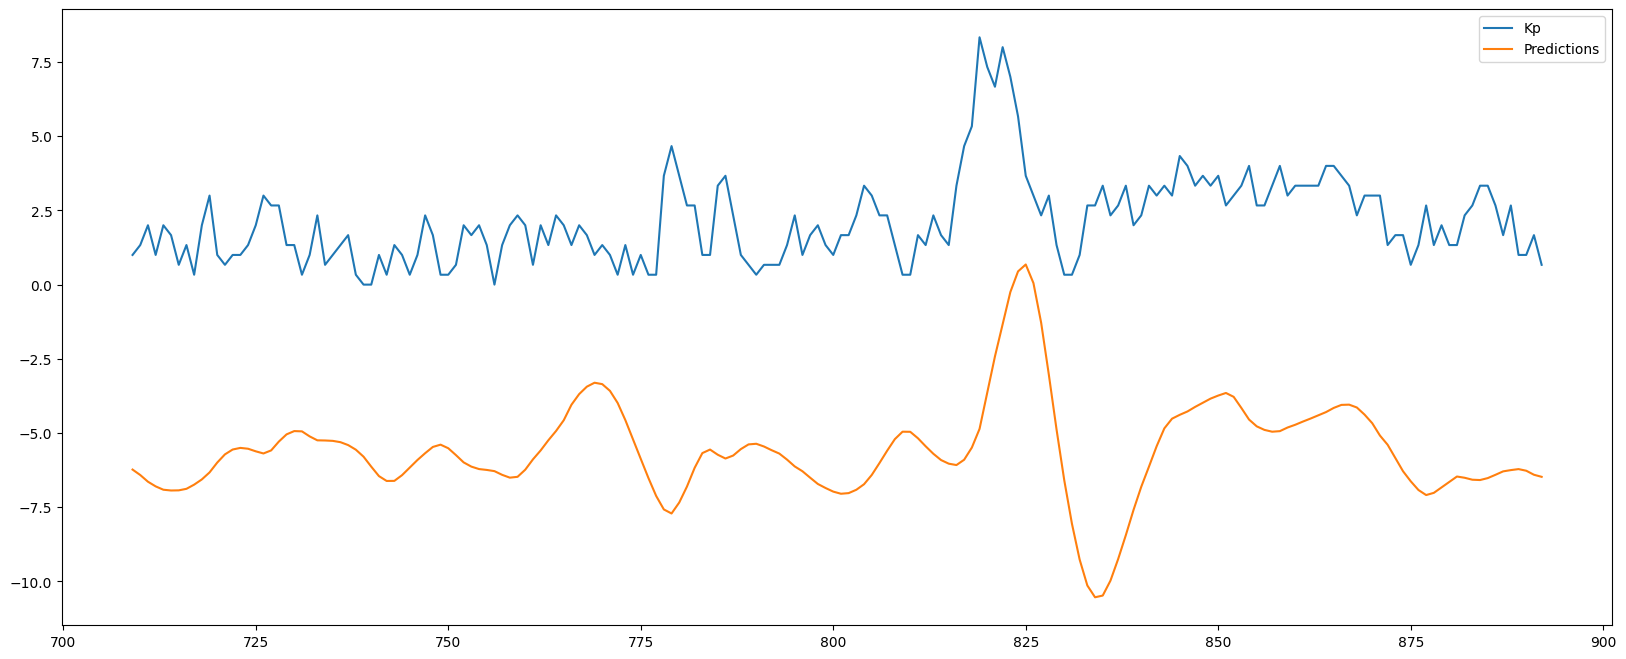

In [ ]:
final[['Kp', 'Predictions']].plot(figsize=(20, 8))